Importing Modules

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from pandas.plotting import scatter_matrix

Loading Data

In [26]:
urltrain = 'https://raw.githubusercontent.com/Azmal16/Datasets/main/HackerEarth_Windmill/train.csv'
urltest = 'https://raw.githubusercontent.com/Azmal16/Datasets/main/HackerEarth_Windmill/test.csv'
traindata = pd.read_csv(urltrain)
testdata = pd.read_csv(urltest)

In [27]:
traindata

tracking_id  ... windmill_generated_power(kW/h)
0        WM_33725  ...                       6.766521
1          WM_698  ...                       5.966275
2        WM_39146  ...                       2.874342
3         WM_6757  ...                      14.851089
4        WM_21521  ...                       3.519074
...           ...  ...                            ...
28195     WM_7814  ...                       9.587934
28196    WM_32512  ...                       4.522195
28197     WM_5193  ...                      11.096599
28198    WM_12173  ...                       9.373239
28199    WM_33004  ...                       2.860342

[28200 rows x 22 columns]

In [28]:
testdata

tracking_id             datetime  ...  blade_breadth(m)  windmill_height(m)
0        WM_19817  2019-04-17 08:53:20  ...          0.403965           25.572431
1        WM_18723  2019-03-30 07:43:20  ...          0.444755           24.371823
2        WM_34552  2019-08-10 11:33:20  ...          0.387368           27.654677
3        WM_28570  2019-06-26 03:53:20  ...          0.450478           24.189426
4        WM_36934  2019-08-27 16:43:20  ...          0.368355            4.885440
...           ...                  ...  ...               ...                 ...
12081    WM_13376  2019-02-12 11:33:20  ...          0.407771           20.888674
12082     WM_1630  2018-11-12 17:33:20  ...          0.367823           24.793606
12083    WM_24703  2019-05-27 11:53:20  ...          0.459887            5.653451
12084    WM_22893  2019-05-13 21:53:20  ...          0.394680           24.591364
12085    WM_14513  2019-02-20 23:43:20  ...          0.490893           21.665001

[12086 rows x 21 columns]

In [29]:
traindata.head()

tracking_id  ... windmill_generated_power(kW/h)
0    WM_33725  ...                       6.766521
1      WM_698  ...                       5.966275
2    WM_39146  ...                       2.874342
3     WM_6757  ...                      14.851089
4    WM_21521  ...                       3.519074

[5 rows x 22 columns]

In [30]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

#EDA

In [31]:
traindata=traindata.drop(['tracking_id', 'datetime'], axis = 1)

In [32]:
traindata

wind_speed(m/s)  ...  windmill_generated_power(kW/h)
0            94.820023  ...                        6.766521
1           241.832734  ...                        5.966275
2            95.484724  ...                        2.874342
3           238.819424  ...                       14.851089
4            10.722890  ...                        3.519074
...                ...  ...                             ...
28195        94.765699  ...                        9.587934
28196        94.196738  ...                        4.522195
28197        94.160463  ...                       11.096599
28198        95.430377  ...                        9.373239
28199        43.558352  ...                        2.860342

[28200 rows x 20 columns]

In [33]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 27927 non-null  float64
 1   atmospheric_temperature(°C)     24750 non-null  float64
 2   shaft_temperature(°C)           28198 non-null  float64
 3   blades_angle(°)                 27984 non-null  float64
 4   gearbox_temperature(°C)         28199 non-null  float64
 5   engine_temperature(°C)          28188 non-null  float64
 6   motor_torque(N-m)               28176 non-null  float64
 7   generator_temperature(°C)       28188 non-null  float64
 8   atmospheric_pressure(Pascal)    25493 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   25837 non-null  float64
 11  wind_direction(°)               23097 non-null  float64
 12  resistance(ohm)                 

In [35]:
traindata["turbine_status"].value_counts()

BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64

In [36]:
traindata["cloud_level"].value_counts()

Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64

In [37]:
traindata.describe()

wind_speed(m/s)  ...  windmill_generated_power(kW/h)
count     27927.000000  ...                    27993.000000
mean         69.037071  ...                        6.130529
std          76.275645  ...                        2.697520
min        -496.211029  ...                        0.962305
25%          20.883502  ...                        4.059505
50%          93.302129  ...                        5.764710
75%          95.268058  ...                        7.947195
max         601.455670  ...                       20.175358

[8 rows x 18 columns]

Visualisation 

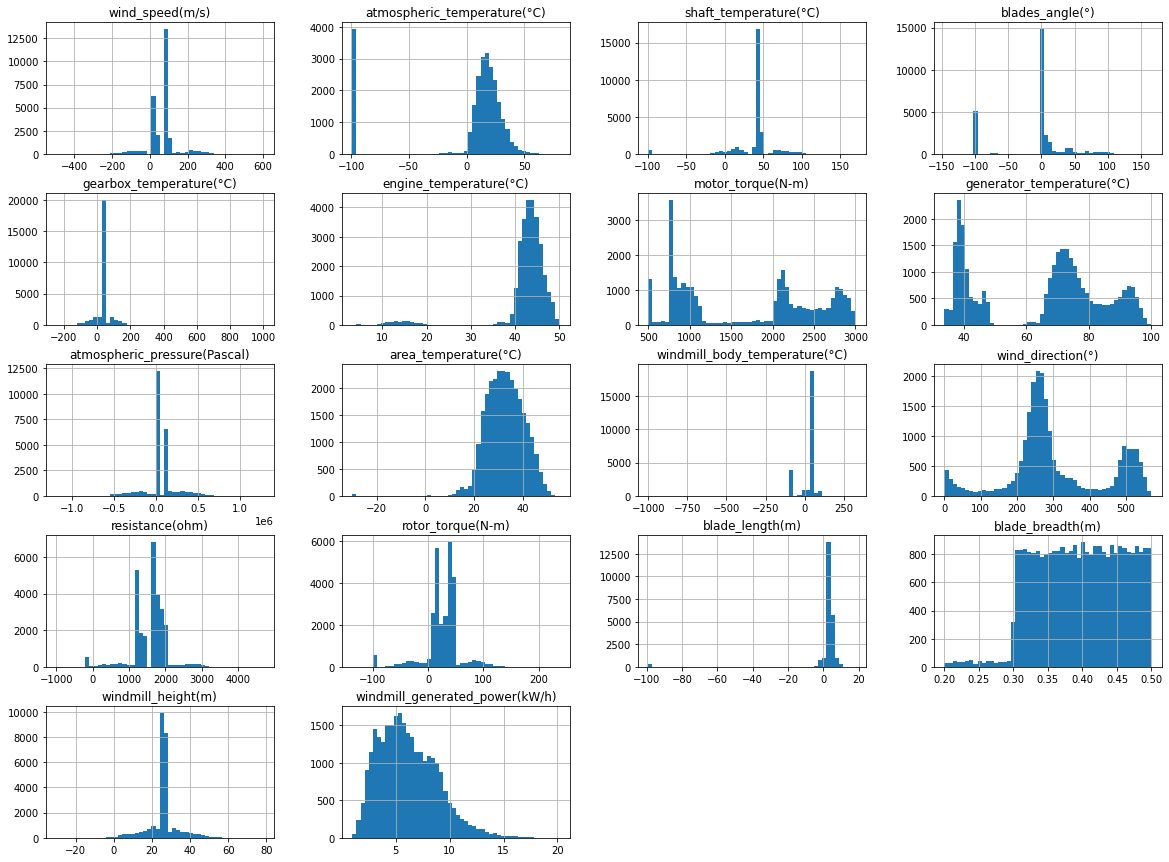

In [38]:
traindata.hist(bins=50, figsize=(20,15)) 
plt.show()

In [39]:
traindata.head()

wind_speed(m/s)  ...  windmill_generated_power(kW/h)
0        94.820023  ...                        6.766521
1       241.832734  ...                        5.966275
2        95.484724  ...                        2.874342
3       238.819424  ...                       14.851089
4        10.722890  ...                        3.519074

[5 rows x 20 columns]

Handling NaN values for categotical features

In [40]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [41]:
#2. Call function to impute most occured category
for Columns in ['turbine_status','cloud_level']:
    impute_nan_most_frequent_category(traindata,Columns)

In [42]:
# Display imputed result
traindata[['turbine_status','turbine_status_Imputed','cloud_level','cloud_level_Imputed']].head(50)

turbine_status turbine_status_Imputed    cloud_level cloud_level_Imputed
0              BA                     BA         Medium              Medium
1              A2                     A2         Medium              Medium
2             ABC                    ABC         Medium              Medium
3             ABC                    ABC            NaN                 Low
4             AAA                    AAA         Medium              Medium
5             ABC                    ABC            Low                 Low
6              BD                     BD            Low                 Low
7              BA                     BA            Low                 Low
8             ABC                    ABC            Low                 Low
9              AC                     AC  Extremely Low       Extremely Low
10             BB                     BB         Medium              Medium
11            BCB                    BCB            Low                 Low
12            BCB                    BCB         Medium              Medium
13             AC                     AC         Medium              Medium
14             AC                     AC         Medium              Medium
15             A2                     A2         Medium              Medium
16              B                      B         Medium              Medium
17            BCB                    BCB         Medium              Medium
18            BCB                    BCB         Medium              Medium
19             BA                     BA         Medium              Medium
20            ABC                    ABC         Medium              Medium
21             A2                     A2            Low                 Low
22             AB                     AB            Low                 Low
23            NaN                     BB         Medium              Medium
24            NaN                     BB            Low                 Low
25             AB                     AB            Low                 Low
26             BA                     BA         Medium              Medium
27             A2                     A2         Medium              Medium
28             B2                     B2            Low                 Low
29             AB                     AB            Low                 Low
30            BBB                    BBB         Medium              Medium
31              A                      A         Medium              Medium
32             BB                     BB         Medium              Medium
33            BBB                    BBB            Low                 Low
34            ABC                    ABC            NaN                 Low
35             B2                     B2            Low                 Low
36              B                      B            Low                 Low
37            NaN                     BB         Medium              Medium
38            AAA                    AAA         Medium              Medium
39             AC                     AC         Medium              Medium
40            AAA                    AAA            Low                 Low
41              B                      B            Low                 Low
42              D                      D         Medium              Medium
43             AC                     AC         Medium              Medium
44            ABC                    ABC            Low                 Low
45            BBB                    BBB         Medium              Medium
46             BB                     BB         Medium              Medium
47            BBB                    BBB            Low                 Low
48            AAA                    AAA            Low                 Low
49            NaN                     BB         Medium              Medium

In [43]:
#3. Drop actual columns
traindata = traindata.drop(['turbine_status','cloud_level'], axis = 1)

In [44]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 27927 non-null  float64
 1   atmospheric_temperature(°C)     24750 non-null  float64
 2   shaft_temperature(°C)           28198 non-null  float64
 3   blades_angle(°)                 27984 non-null  float64
 4   gearbox_temperature(°C)         28199 non-null  float64
 5   engine_temperature(°C)          28188 non-null  float64
 6   motor_torque(N-m)               28176 non-null  float64
 7   generator_temperature(°C)       28188 non-null  float64
 8   atmospheric_pressure(Pascal)    25493 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   25837 non-null  float64
 11  wind_direction(°)               23097 non-null  float64
 12  resistance(ohm)                 

In [45]:
traindata.turbine_status_Imputed

0         BA
1         A2
2        ABC
3        ABC
4        AAA
        ... 
28195     BB
28196     BB
28197      D
28198    BCB
28199    BBB
Name: turbine_status_Imputed, Length: 28200, dtype: object

In [46]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 27927 non-null  float64
 1   atmospheric_temperature(°C)     24750 non-null  float64
 2   shaft_temperature(°C)           28198 non-null  float64
 3   blades_angle(°)                 27984 non-null  float64
 4   gearbox_temperature(°C)         28199 non-null  float64
 5   engine_temperature(°C)          28188 non-null  float64
 6   motor_torque(N-m)               28176 non-null  float64
 7   generator_temperature(°C)       28188 non-null  float64
 8   atmospheric_pressure(Pascal)    25493 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   25837 non-null  float64
 11  wind_direction(°)               23097 non-null  float64
 12  resistance(ohm)                 

Handling NaN values for numerical features

In [50]:
for i in traindata.columns:
    if traindata[i].isnull().sum()>0:
        mode = traindata[i].mode()
        traindata[i].replace(np.nan, mode, inplace=True)

In [52]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

Finding correlations

In [53]:
corr_matrix = traindata.corr()
corr_matrix["windmill_generated_power(kW/h)"].sort_values(ascending=False)

windmill_generated_power(kW/h)    1.000000
motor_torque(N-m)                 0.503155
generator_temperature(°C)         0.390092
area_temperature(°C)              0.383173
wind_direction(°)                 0.311539
engine_temperature(°C)            0.271819
resistance(ohm)                   0.239190
rotor_torque(N-m)                 0.184737
blade_breadth(m)                  0.085642
wind_speed(m/s)                   0.062246
gearbox_temperature(°C)           0.053017
shaft_temperature(°C)             0.046366
blade_length(m)                   0.012881
windmill_height(m)                0.003855
windmill_body_temperature(°C)     0.003054
atmospheric_temperature(°C)      -0.000941
atmospheric_pressure(Pascal)     -0.012578
blades_angle(°)                  -0.153607
Name: windmill_generated_power(kW/h), dtype: float64

Visualizing Correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b6055f610>,
      dtype=object)

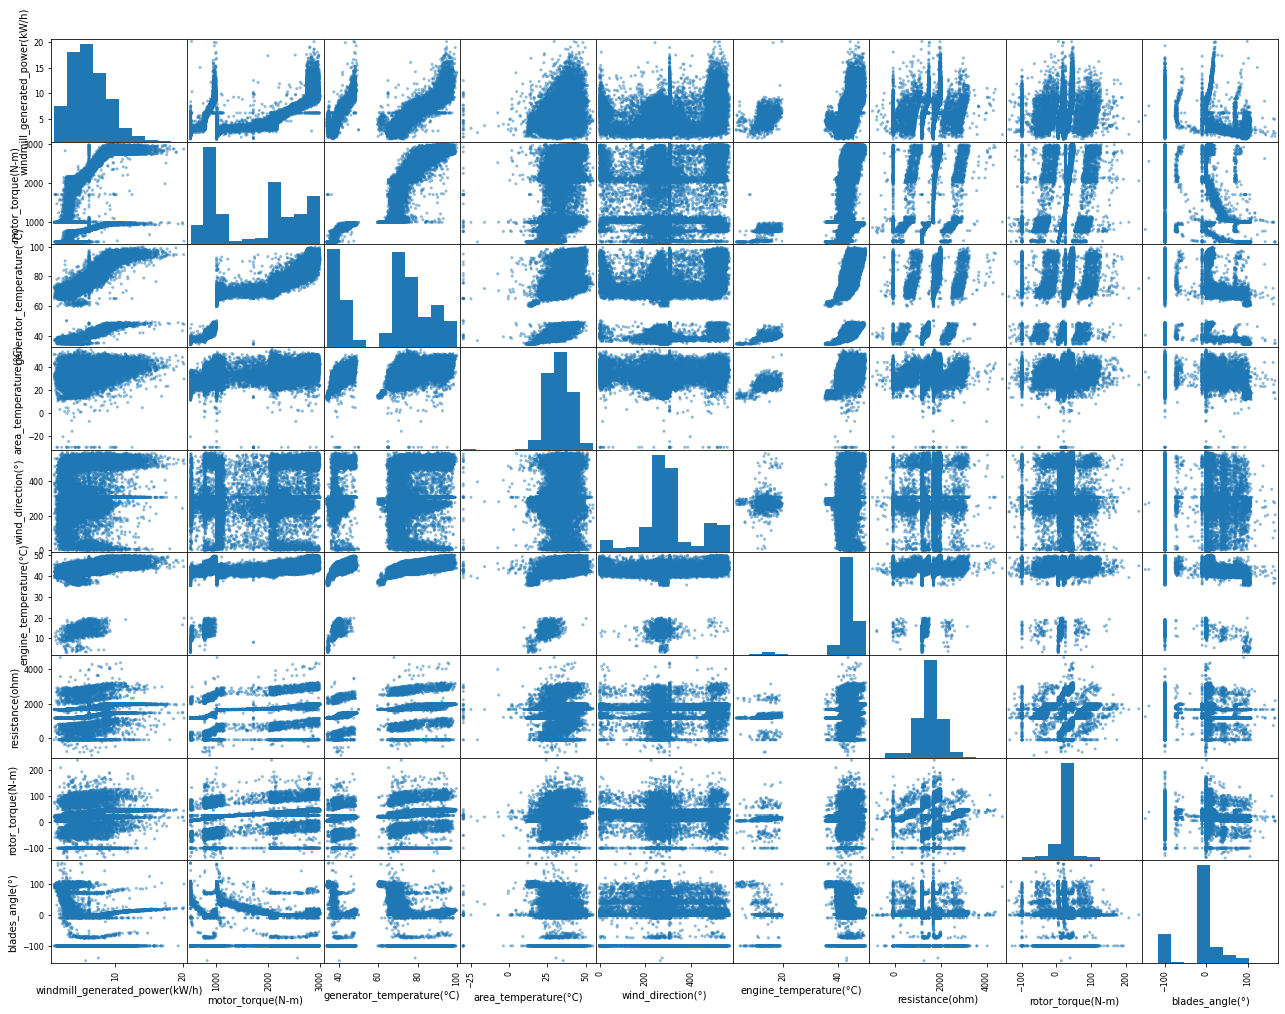

In [54]:
attributes = ["windmill_generated_power(kW/h)", 
              "motor_torque(N-m)", 
              "generator_temperature(°C)", 
              "area_temperature(°C)",
              "wind_direction(°)",
              "engine_temperature(°C)",
              "resistance(ohm)",
              "rotor_torque(N-m)",
              "blades_angle(°)"
              ]
scatter_matrix(traindata[attributes], figsize=(22, 17))

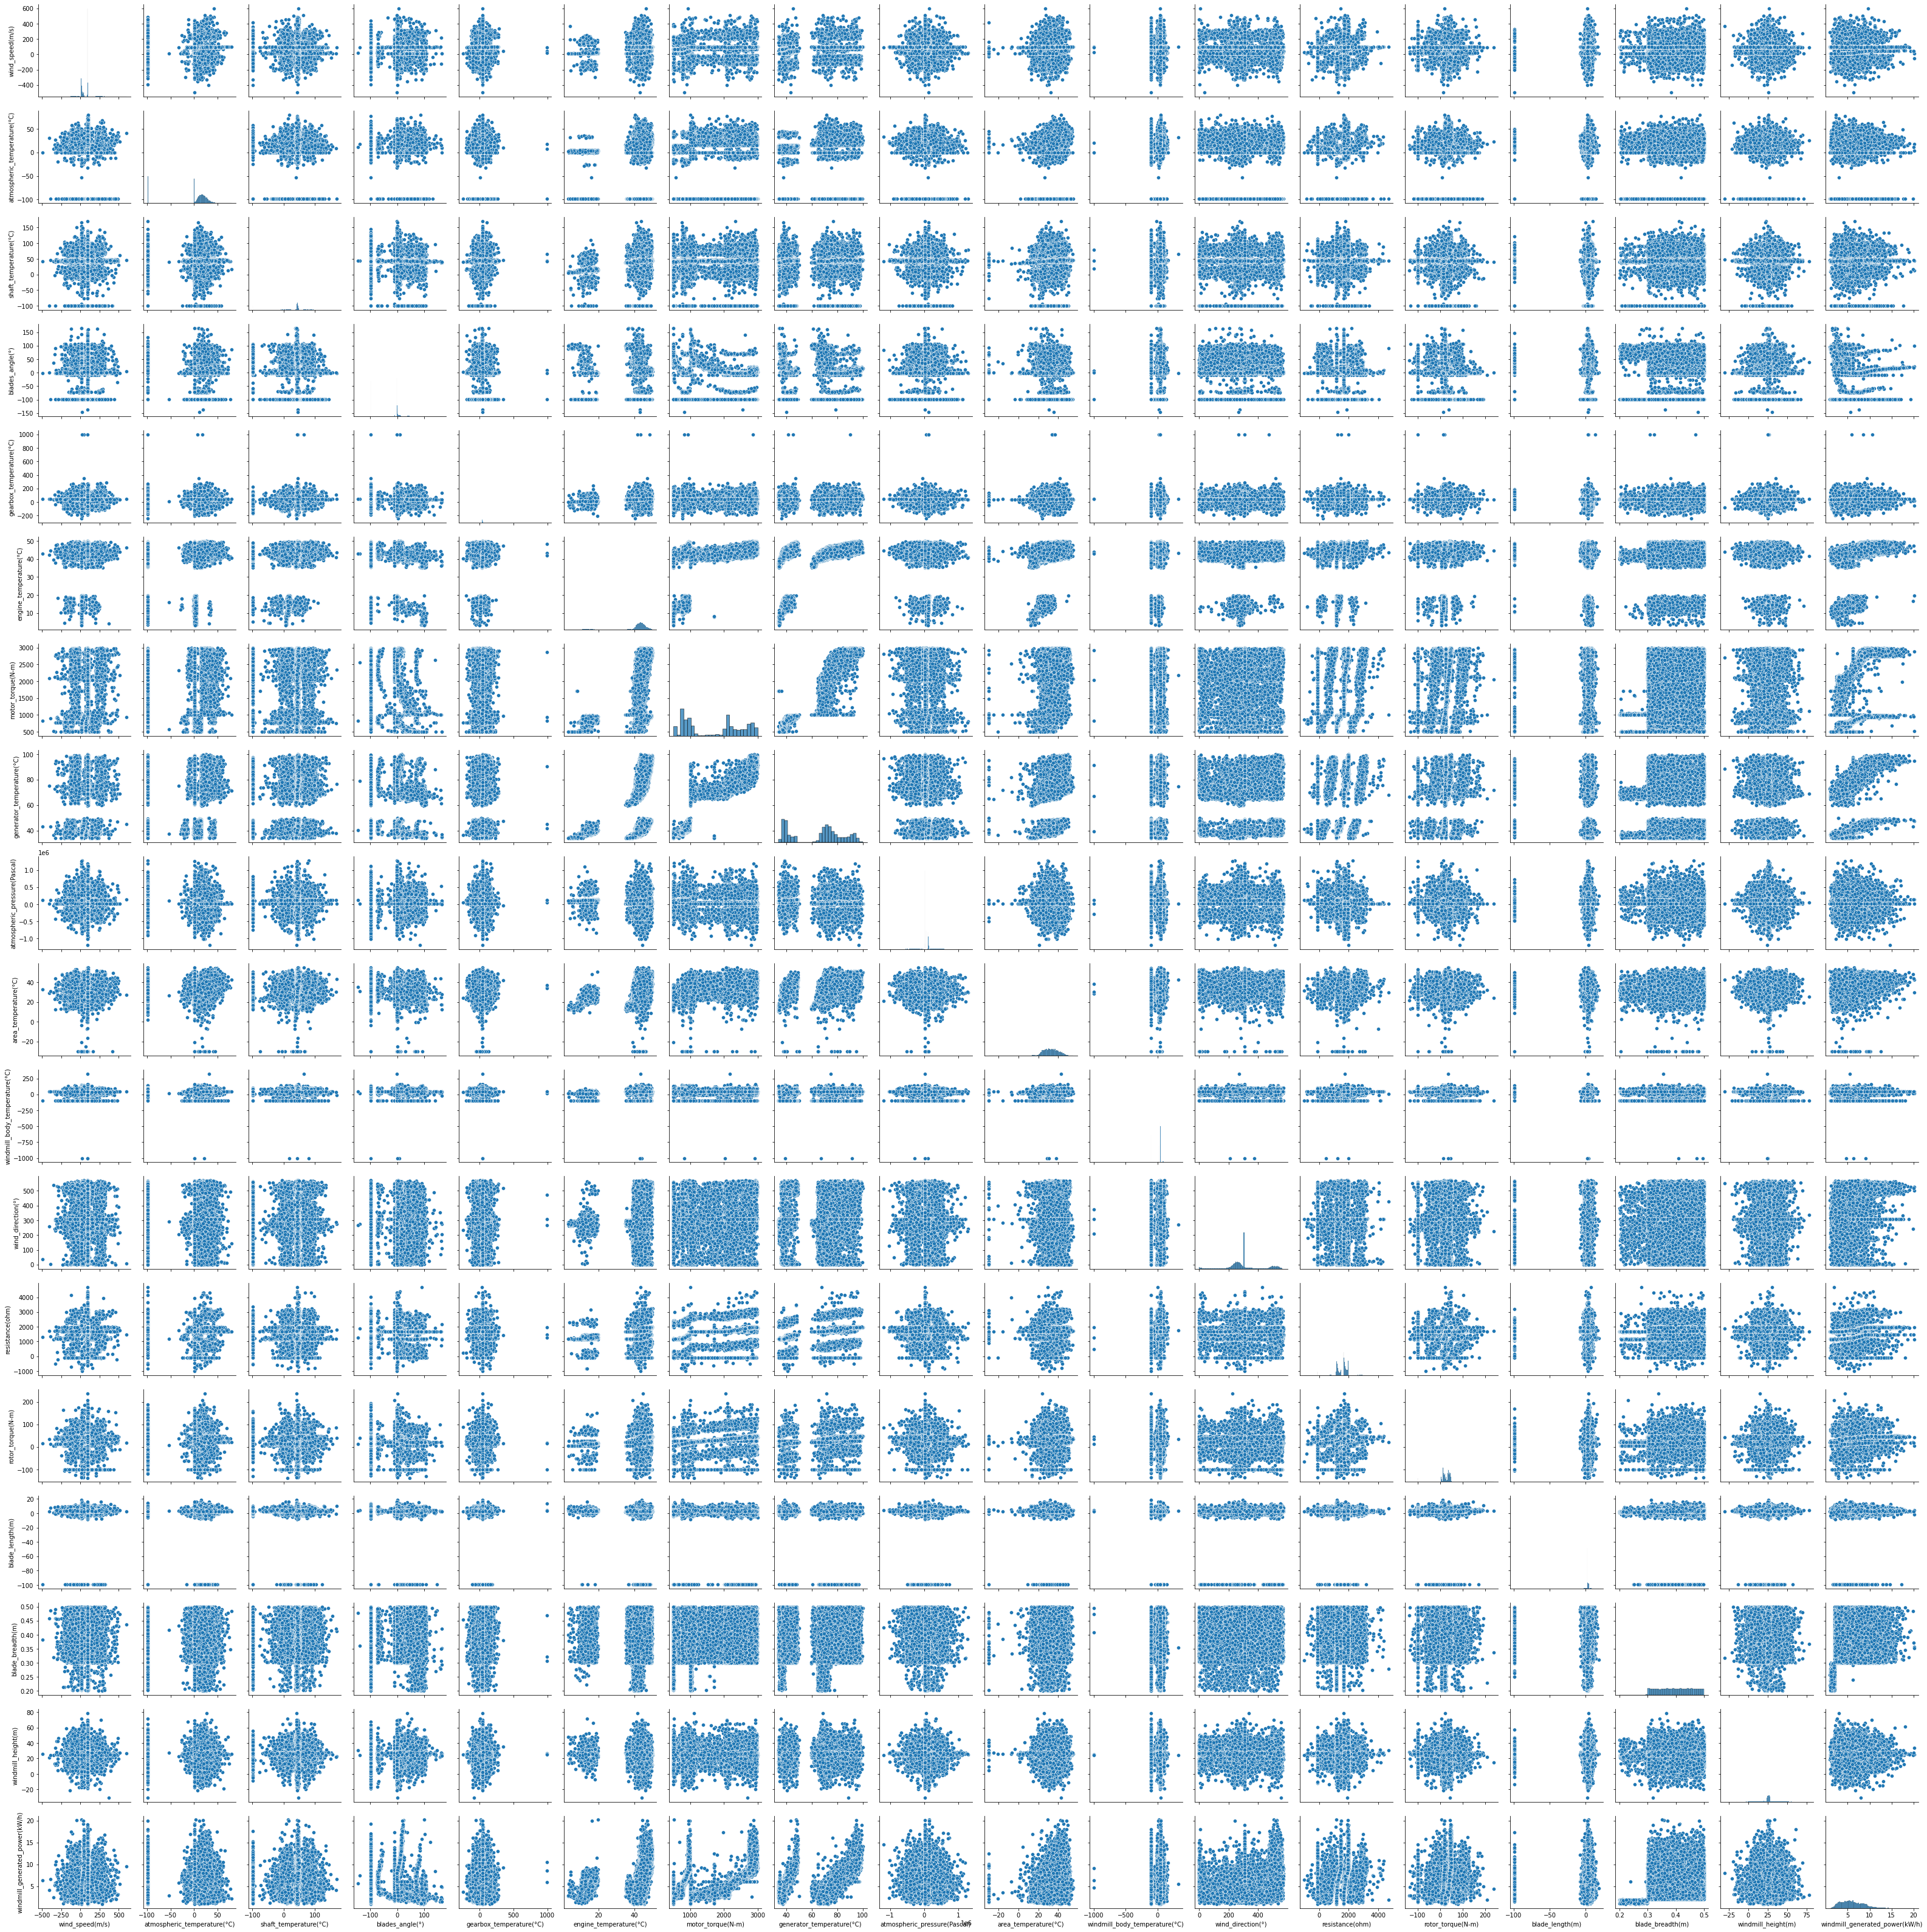

In [55]:
sns.pairplot(traindata)

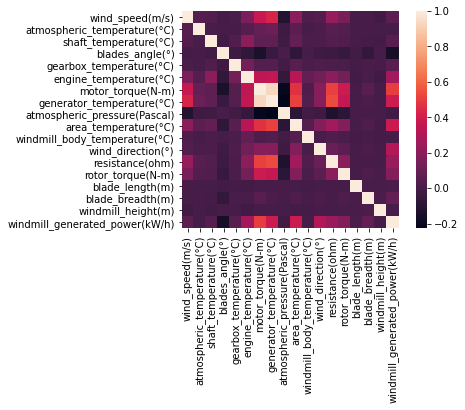

In [56]:
sns.heatmap(traindata.corr(),square='True')

One hot encoding the categoricl values

In [57]:
y1 = pd.get_dummies(traindata.cloud_level_Imputed, prefix='cloud_level')

In [58]:
y1

cloud_level_Extremely Low  cloud_level_Low  cloud_level_Medium
0                              0                0                   1
1                              0                0                   1
2                              0                0                   1
3                              0                1                   0
4                              0                0                   1
...                          ...              ...                 ...
28195                          0                0                   1
28196                          0                1                   0
28197                          0                0                   1
28198                          0                1                   0
28199                          0                1                   0

[28200 rows x 3 columns]

In [59]:
y2 = pd.get_dummies(traindata.turbine_status_Imputed, prefix='turbine_status')

In [60]:
y2

turbine_status_A  turbine_status_A2  ...  turbine_status_BD  turbine_status_D
0                     0                  0  ...                  0                 0
1                     0                  1  ...                  0                 0
2                     0                  0  ...                  0                 0
3                     0                  0  ...                  0                 0
4                     0                  0  ...                  0                 0
...                 ...                ...  ...                ...               ...
28195                 0                  0  ...                  0                 0
28196                 0                  0  ...                  0                 0
28197                 0                  0  ...                  0                 1
28198                 0                  0  ...                  0                 0
28199                 0                  0  ...                  0                 0

[28200 rows x 14 columns]

In [61]:
dftr=pd.concat([traindata, y1,y2], axis=1)

In [62]:
dftr

wind_speed(m/s)  ...  turbine_status_D
0            94.820023  ...                 0
1           241.832734  ...                 0
2            95.484724  ...                 0
3           238.819424  ...                 0
4            10.722890  ...                 0
...                ...  ...               ...
28195        94.765699  ...                 0
28196        94.196738  ...                 0
28197        94.160463  ...                 1
28198        95.430377  ...                 0
28199        43.558352  ...                 0

[28200 rows x 37 columns]

In [63]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

In [64]:
dftr=dftr.drop(['turbine_status_Imputed', 'cloud_level_Imputed'], axis = 1)

In [65]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

In [66]:
dftr.head()

wind_speed(m/s)  ...  turbine_status_D
0        94.820023  ...                 0
1       241.832734  ...                 0
2        95.484724  ...                 0
3       238.819424  ...                 0
4        10.722890  ...                 0

[5 rows x 35 columns]

Separating Target variable of Train data

In [72]:
ytr = dftr['windmill_generated_power(kW/h)']

In [73]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

In [77]:
ytr

0         6.766521
1         5.966275
2         2.874342
3        14.851089
4         3.519074
           ...    
28195     9.587934
28196     4.522195
28197    11.096599
28198     9.373239
28199     2.860342
Name: windmill_generated_power(kW/h), Length: 28200, dtype: float64

In [78]:
Xtr=dftr.drop(['windmill_generated_power(kW/h)'], axis = 1)

In [79]:
Xtr

wind_speed(m/s)  ...  turbine_status_D
0            94.820023  ...                 0
1           241.832734  ...                 0
2            95.484724  ...                 0
3           238.819424  ...                 0
4            10.722890  ...                 0
...                ...  ...               ...
28195        94.765699  ...                 0
28196        94.196738  ...                 0
28197        94.160463  ...                 1
28198        95.430377  ...                 0
28199        43.558352  ...                 0

[28200 rows x 34 columns]

Model Evaluation on Testong Subset of Train Data

In [80]:
from sklearn.model_selection import train_test_split
Xtr_train, Xtr_test, ytr_train, ytr_test = train_test_split(Xtr, ytr, test_size=0.20, random_state=42)

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(Xtr_train, ytr_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [128]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(Xtr_train, ytr_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [91]:
ytr_pred_dtr = dtr.predict(Xtr_test)

In [92]:
ytr_pred_dtr

array([2.81571988, 2.91228808, 8.15438972, ..., 1.9006699 , 6.6385698 ,
       8.84090925])

In [129]:
ytr_pred_rfr = rfr.predict(Xtr_test)

In [130]:
ytr_pred_rfr

array([ 2.60984616,  3.18808895,  8.39155363, ...,  1.7796983 ,
        6.78560957, 10.0001335 ])

In [131]:
scoretr_dtr = max(0,100*metrics.r2_score(ytr_test,ytr_pred_dtr))

In [132]:
scoretr_dtr

89.93071890928748

In [133]:
scoretr_rfr = max(0,100*metrics.r2_score(ytr_test,ytr_pred_rfr))

In [134]:
scoretr_rfr

95.32158766827048

##Processing the Test Data same way as Train Data

In [96]:
testdata

tracking_id             datetime  ...  blade_breadth(m)  windmill_height(m)
0        WM_19817  2019-04-17 08:53:20  ...          0.403965           25.572431
1        WM_18723  2019-03-30 07:43:20  ...          0.444755           24.371823
2        WM_34552  2019-08-10 11:33:20  ...          0.387368           27.654677
3        WM_28570  2019-06-26 03:53:20  ...          0.450478           24.189426
4        WM_36934  2019-08-27 16:43:20  ...          0.368355            4.885440
...           ...                  ...  ...               ...                 ...
12081    WM_13376  2019-02-12 11:33:20  ...          0.407771           20.888674
12082     WM_1630  2018-11-12 17:33:20  ...          0.367823           24.793606
12083    WM_24703  2019-05-27 11:53:20  ...          0.459887            5.653451
12084    WM_22893  2019-05-13 21:53:20  ...          0.394680           24.591364
12085    WM_14513  2019-02-20 23:43:20  ...          0.490893           21.665001

[12086 rows x 21 columns]

In [97]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [98]:
testdata_copy=testdata.drop(['tracking_id', 'datetime'], axis = 1)

In [100]:
testdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                11960 non-null  float64
 1   atmospheric_temperature(°C)    10659 non-null  float64
 2   shaft_temperature(°C)          12085 non-null  float64
 3   blades_angle(°)                11980 non-null  float64
 4   gearbox_temperature(°C)        12085 non-null  float64
 5   engine_temperature(°C)         12081 non-null  float64
 6   motor_torque(N-m)              12075 non-null  float64
 7   generator_temperature(°C)      12081 non-null  float64
 8   atmospheric_pressure(Pascal)   10935 non-null  float64
 9   area_temperature(°C)           12085 non-null  float64
 10  windmill_body_temperature(°C)  11160 non-null  float64
 11  wind_direction(°)              9926 non-null   float64
 12  resistance(ohm)                12086 non-null 

In [102]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [103]:
#2. Call function to impute most occured category
for Columns in ['turbine_status','cloud_level']:
    impute_nan_most_frequent_category(testdata_copy,Columns)

In [104]:
# Display imputed result
testdata_copy[['turbine_status','turbine_status_Imputed','cloud_level','cloud_level_Imputed']].head(20)

turbine_status turbine_status_Imputed cloud_level cloud_level_Imputed
0              BA                     BA      Medium              Medium
1               A                      A      Medium              Medium
2              B2                     B2      Medium              Medium
3             BBB                    BBB         Low                 Low
4               A                      A         Low                 Low
5              BB                     BB      Medium              Medium
6             AAA                    AAA         Low                 Low
7             BCB                    BCB      Medium              Medium
8               B                      B         Low                 Low
9              BA                     BA         Low                 Low
10            AAA                    AAA         Low                 Low
11            AAA                    AAA      Medium              Medium
12            BBB                    BBB         Low                 Low
13             BB                     BB         Low                 Low
14             BA                     BA      Medium              Medium
15             B2                     B2      Medium              Medium
16             B2                     B2         Low                 Low
17            NaN                     BB         Low                 Low
18              B                      B      Medium              Medium
19              D                      D      Medium              Medium

In [105]:
#3. Drop actual columns
testdata_copy = testdata_copy.drop(['turbine_status','cloud_level'], axis = 1)

In [107]:
testdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                11960 non-null  float64
 1   atmospheric_temperature(°C)    10659 non-null  float64
 2   shaft_temperature(°C)          12085 non-null  float64
 3   blades_angle(°)                11980 non-null  float64
 4   gearbox_temperature(°C)        12085 non-null  float64
 5   engine_temperature(°C)         12081 non-null  float64
 6   motor_torque(N-m)              12075 non-null  float64
 7   generator_temperature(°C)      12081 non-null  float64
 8   atmospheric_pressure(Pascal)   10935 non-null  float64
 9   area_temperature(°C)           12085 non-null  float64
 10  windmill_body_temperature(°C)  11160 non-null  float64
 11  wind_direction(°)              9926 non-null   float64
 12  resistance(ohm)                12086 non-null 

In [112]:
for i in testdata_copy.columns:
    if testdata_copy[i].isnull().sum()>0:
        mode = testdata_copy[i].mode()
        testdata_copy[i].replace(np.nan, mode, inplace=True)

In [113]:
testdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                12086 non-null  float64
 1   atmospheric_temperature(°C)    12086 non-null  float64
 2   shaft_temperature(°C)          12086 non-null  float64
 3   blades_angle(°)                12086 non-null  float64
 4   gearbox_temperature(°C)        12086 non-null  float64
 5   engine_temperature(°C)         12086 non-null  float64
 6   motor_torque(N-m)              12086 non-null  float64
 7   generator_temperature(°C)      12086 non-null  float64
 8   atmospheric_pressure(Pascal)   12086 non-null  float64
 9   area_temperature(°C)           12086 non-null  float64
 10  windmill_body_temperature(°C)  12086 non-null  float64
 11  wind_direction(°)              12086 non-null  float64
 12  resistance(ohm)                12086 non-null 

In [114]:
y3 = pd.get_dummies(testdata_copy.cloud_level_Imputed, prefix='cloud_level')

In [115]:
y4 = pd.get_dummies(testdata_copy.turbine_status_Imputed, prefix='turbine_status')

In [116]:
dftest=pd.concat([testdata_copy, y3,y4], axis=1)

In [120]:
dftest=dftest.drop(['turbine_status_Imputed', 'cloud_level_Imputed'], axis = 1)

In [121]:
dftr

wind_speed(m/s)  ...  turbine_status_D
0            94.820023  ...                 0
1           241.832734  ...                 0
2            95.484724  ...                 0
3           238.819424  ...                 0
4            10.722890  ...                 0
...                ...  ...               ...
28195        94.765699  ...                 0
28196        94.196738  ...                 0
28197        94.160463  ...                 1
28198        95.430377  ...                 0
28199        43.558352  ...                 0

[28200 rows x 35 columns]

In [122]:
dftest

wind_speed(m/s)  ...  turbine_status_D
0            94.324266  ...                 0
1            10.088870  ...                 0
2           347.152090  ...                 0
3            24.471997  ...                 0
4            96.997026  ...                 0
...                ...  ...               ...
12081       -15.039400  ...                 0
12082        97.594116  ...                 0
12083        16.186805  ...                 0
12084        93.254033  ...                 0
12085        42.607485  ...                 0

[12086 rows x 34 columns]

Predicting on test data

In [123]:
ytest_pred_dtr = dtr.predict(dftest)

In [127]:
ytest_pred_dtr

array([ 2.81002767,  2.29171991,  3.42583484, ...,  5.66502204,
        4.83667635, 10.61007922])

In [135]:
ytest_pred_rfr = rfr.predict(dftest)

In [136]:
ytest_pred_rfr

array([ 2.62576814,  2.4377717 ,  3.42418059, ...,  5.31441596,
        5.40139747, 10.86716021])

In [137]:
ytest_pred_dtr.shape

(12086,)

In [138]:
yans = pd.DataFrame({'windmill_generated_power(kW/h)':ytest_pred_rfr}) 

In [139]:
yans

windmill_generated_power(kW/h)
0                            2.625768
1                            2.437772
2                            3.424181
3                            6.687866
4                            3.468116
...                               ...
12081                        6.647843
12082                        3.314279
12083                        5.314416
12084                        5.401397
12085                       10.867160

[12086 rows x 1 columns]

In [140]:
ytd = testdata[['tracking_id','datetime']]

In [141]:
ytd

tracking_id             datetime
0        WM_19817  2019-04-17 08:53:20
1        WM_18723  2019-03-30 07:43:20
2        WM_34552  2019-08-10 11:33:20
3        WM_28570  2019-06-26 03:53:20
4        WM_36934  2019-08-27 16:43:20
...           ...                  ...
12081    WM_13376  2019-02-12 11:33:20
12082     WM_1630  2018-11-12 17:33:20
12083    WM_24703  2019-05-27 11:53:20
12084    WM_22893  2019-05-13 21:53:20
12085    WM_14513  2019-02-20 23:43:20

[12086 rows x 2 columns]

In [142]:
ans =pd.concat([ytd, yans], axis=1)

In [143]:
ans

tracking_id             datetime  windmill_generated_power(kW/h)
0        WM_19817  2019-04-17 08:53:20                        2.625768
1        WM_18723  2019-03-30 07:43:20                        2.437772
2        WM_34552  2019-08-10 11:33:20                        3.424181
3        WM_28570  2019-06-26 03:53:20                        6.687866
4        WM_36934  2019-08-27 16:43:20                        3.468116
...           ...                  ...                             ...
12081    WM_13376  2019-02-12 11:33:20                        6.647843
12082     WM_1630  2018-11-12 17:33:20                        3.314279
12083    WM_24703  2019-05-27 11:53:20                        5.314416
12084    WM_22893  2019-05-13 21:53:20                        5.401397
12085    WM_14513  2019-02-20 23:43:20                       10.867160

[12086 rows x 3 columns]

Making The submission csv file

In [144]:
ans.to_csv("ans.csv")

In [145]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     12086 non-null  object 
 1   datetime                        12086 non-null  object 
 2   windmill_generated_power(kW/h)  12086 non-null  float64
dtypes: float64(1), object(2)
memory usage: 283.4+ KB
